I have defined a simple AR process and found its order using the PACF plot. We should expect our AR process to show gradual decrease in the ACF plot since being an AR process its present has good correlation with the past lags. We expect PACF to have sharp fall after near lags as these lags near to present can capture the variation so well that we don’t need past lags to predict present.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

# Auto Regressive (AR) Process

In [2]:
t = np.linspace(0, 10, 500)
#normal distributed values
ys = np.random.normal(0,5,500)

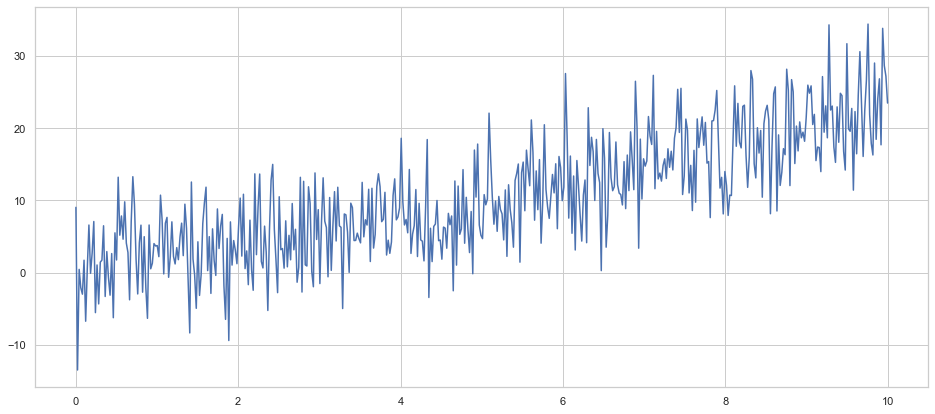

In [3]:
#exponential series to get the trend
ye = np.exp(t**0.5)
#adding normally distributed series in exponential series
y = ys+ye
#plot
plt.figure(figsize=(16,7))
plt.plot(t,y)

## acf

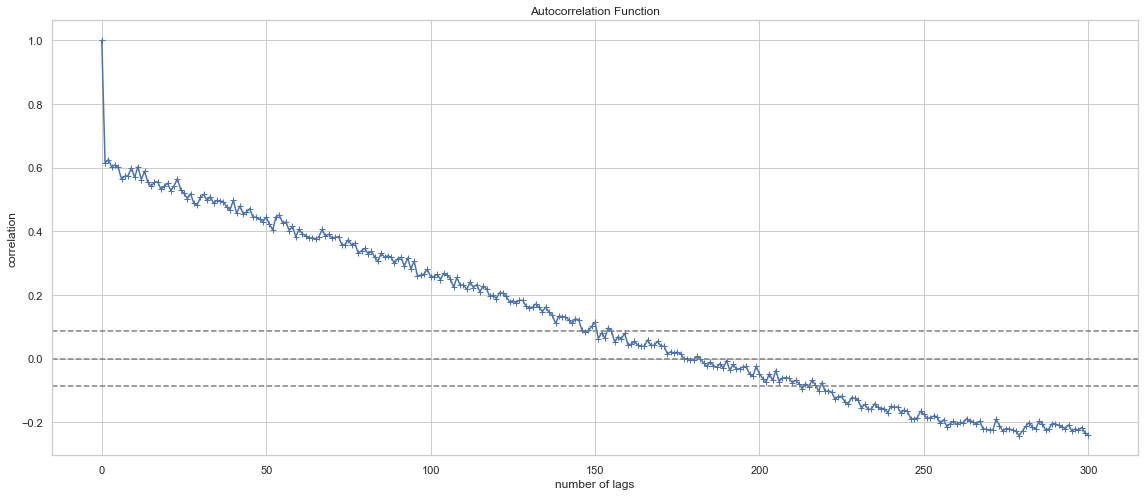

In [7]:

#calling auto correlation function
lag_acf = acf(y, nlags=300)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In the above correlation plot dotted lines represent the confidence band, with center dotted line represents mean and upper and lower dotted line represent boundries based on 95% confidence interval.
Notice that we have good positive correlation with the lags upto 150, this is the point where ACF plot cuts the upper confidence threshold. Although we have good correlation upto 150th lag we cannot use all of them as it will create multi-collinearity problem, thats why we turn to PACF plot to get only the most relevant lags!

## Pacf

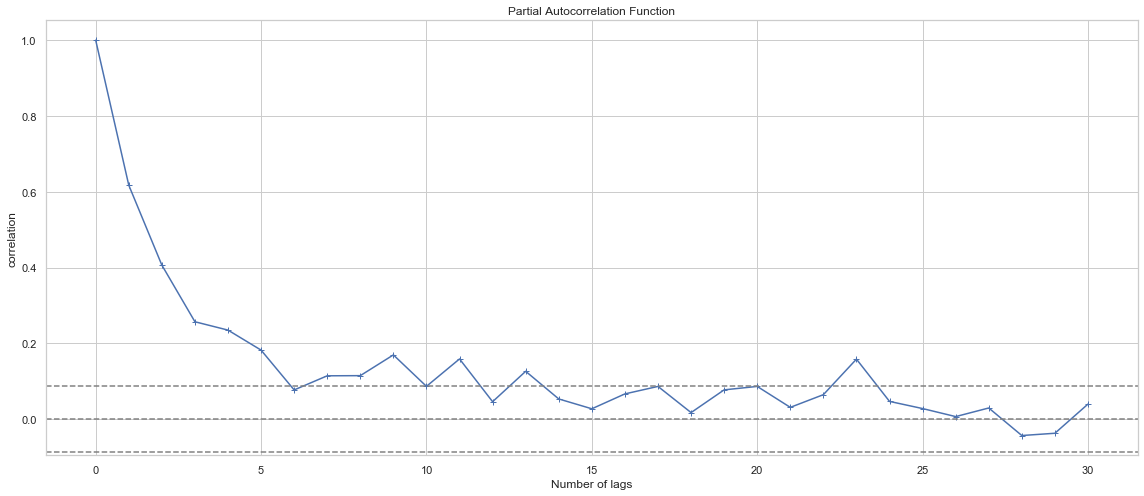

In [13]:
#calling partial correlation function
lag_pacf = pacf(y, nlags=30, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

> In the above plot we can see that lags upto 7 have good correlation before the plot first cuts the upper confidence interval. This is our p value i.e the order of our AR process. We can model given AR process using linear combination of first 7 lags.

## Moving Average (MA) Process

### The Link

As we know PACF captures correlations of residuals and the time series lags, we might get good correlations for nearest lags as well as for past lags. Why would that be? Since our series is linear combination of the residuals and none of time series own lag can directly explain its present (since its not an AR), which is the essence of PACF plot as it subtracts variations already explained by earlier lags, its kind of PACF losing its power here! On the other hand being a MA process, it doesn’t have the seasonal or trend components so the ACF plot will capture the correlations due residual components only. You can also think of it as ACF which is a complete plot (capturing trend, seasonality, cyclic and residual correlations) acting as a partial plot since we don’t have trends, seasons, etc.

I have defined a simple MA process and found its order using the ACF plot. We can expect the ACF plot to show good correlation with nearest lags and then sharp fall as its not an AR process to have good correlation with past lags. Also we would expect the PACF plot to have gradual decrease as being an MA process, nearest lag values of time series cannot really predict its present value unlike AR process.So, we will get good correlations of residuals with further lags as well, hence the gradual decrease.

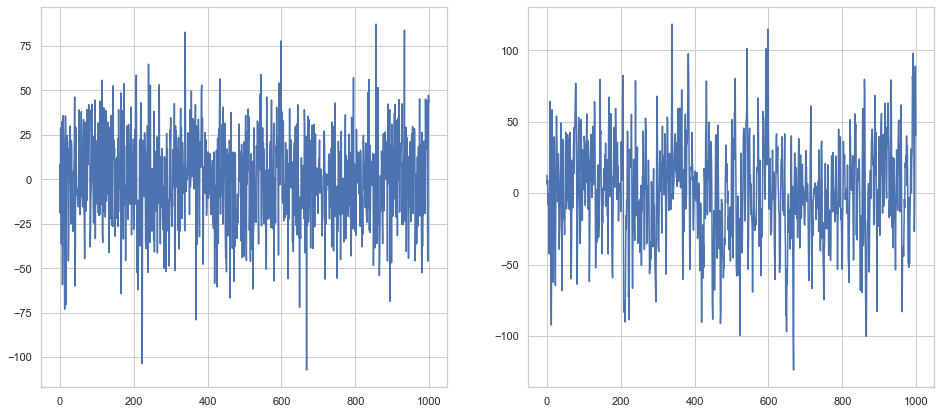

In [14]:
#xma = np.random.randint(1,50000,100)
xma = np.random.normal(0,25,1000)

#lets create a MA series having mean 2 and of order 2
y5 = 2 + xma + 0.8*np.roll(xma,-1) + 0.6*np.roll(xma,-2) #+ 0.6 *np.roll(xma,-3)


plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(xma)
plt.subplot(122)
plt.plot(y5)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


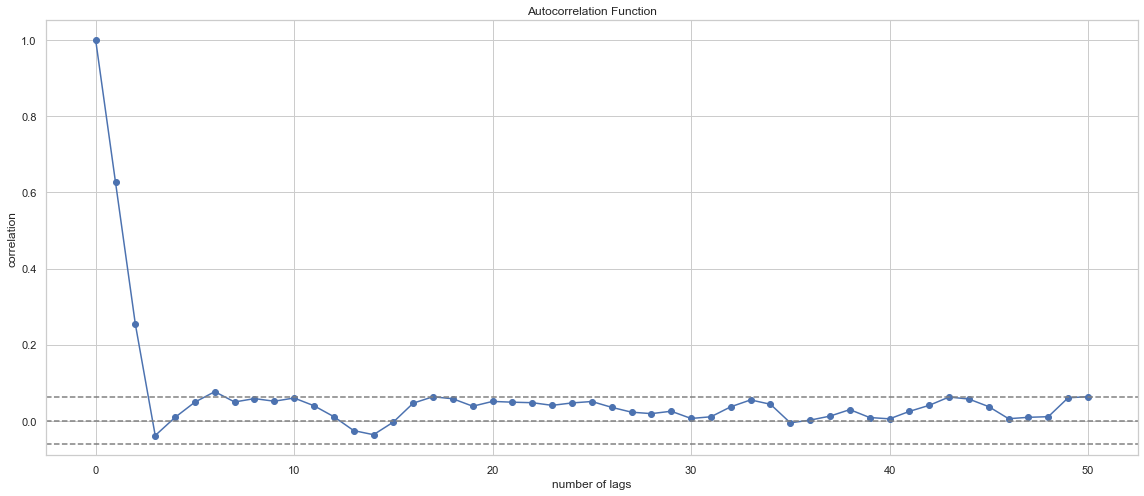

In [26]:
#calling acf function from stattools
lag_acf = acf(y5, nlags=50)
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()


As per above plot we have good correlation upto 2nd lag, this is the lag after which plot cuts the upper confidence interval. Order q of series obtained by the plot is 2, which is correct as we had defined our series with linear combination of residuals upto lag 2.
Thus this proves that ACF correctly predicted order of our MA series.

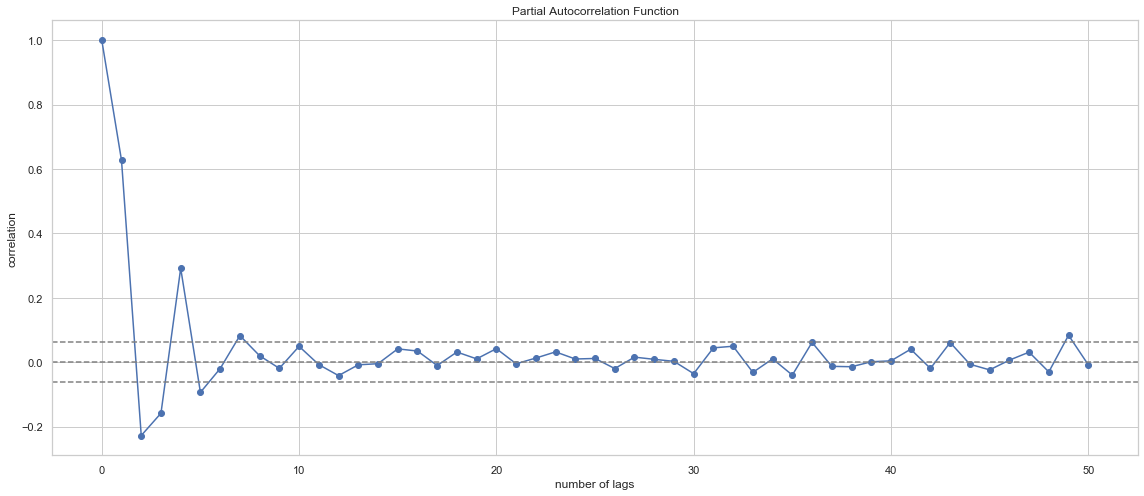

In [27]:

#calling pacf function from stattool
lag_pacf = pacf(y5, nlags=50, method='ols')

#PLOT PACF
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()


If we see PACF plot there are many instances where correlation is above upper confidence band as PACF calculates correlations of lags of time series with residuals and our series itself is linear combination of residual and its lagged values.Hence we can get good correlation for near as well as past lags.

## Conclusion


To summarize,
While building a machine learning model we should avoid multicollinear features. The same applies to time series models as well.
We find optimum features or order of the AR process using the PACF plot, as it removes variations explained by earlier lags so we get only the relevant features.
We find optimum features or order of the MA process using the ACF plot, as being an MA process it doesn’t have seasonal and trend components so we get only the residual relationship with the lags of time series in the ACF plot. ACF acting as a partial plot.